In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
print(type(pd))

<class 'module'>


### 1. `maindata_ver1.2.csv` 불러와서 데이터 프레임 저장

In [29]:
maindata = pd.read_csv('/content/drive/MyDrive/EPOCH/data/maindata_ver2.0.csv')
maindata = pd.DataFrame(maindata)

### 2. 컬럼 간 상관관계 분석
2-1. 유의미한 컬럼들과 revenue 간의 상관관계

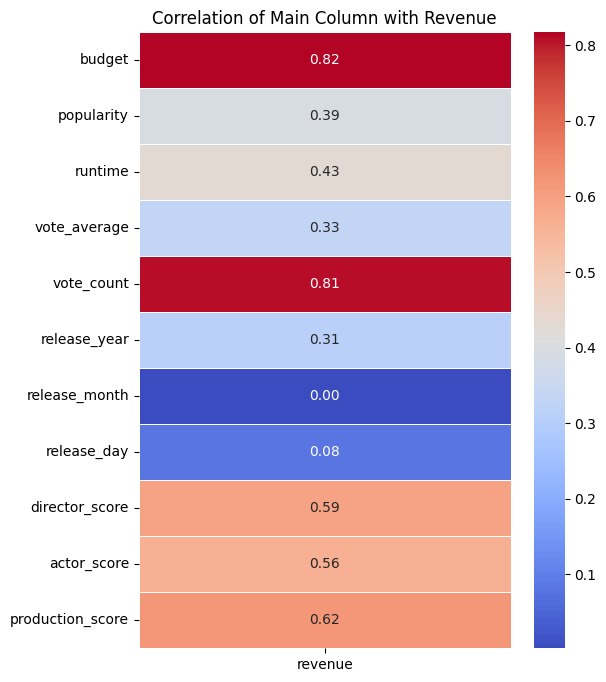

In [30]:
# 유의미한 컬럼만 추출
main_col = maindata[['budget', 'popularity', 'runtime','vote_average', 'vote_count', 'release_year', 'release_month', 'release_day', 'director_score', 'actor_score', 'production_score', 'revenue']]
maincol_corr = main_col.corr()[['revenue']].drop('revenue')

# 직사각형 상관관계 히트맵 시각화
plt.figure(figsize=(6, 8))
sns.heatmap(maincol_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Main Column with Revenue')
plt.show()

2-2. 장르 컬럼과 revenue 컬럼 간의 상관관계

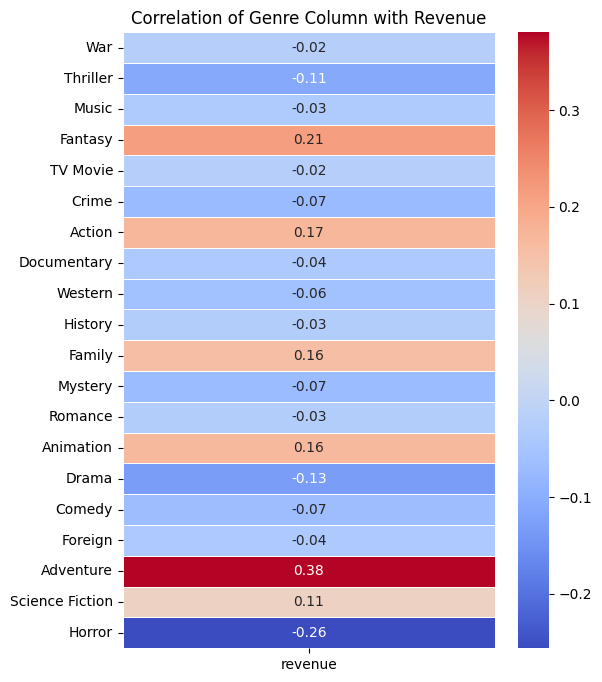

In [7]:
# 장르 컬럼만 추출
genre_col = maindata[['War', 'Thriller',	'Music',	'Fantasy',	'TV Movie',	'Crime',	'Action',	'Documentary',	'Western',	'History',	'Family',	'Mystery',	'Romance',	'Animation',	'Drama',	'Comedy',	'Foreign',	'Adventure',	'Science Fiction',	'Horror', 'revenue']]
genre_corr = genre_col.corr()[['revenue']].drop('revenue')

# 직사각형 상관관계 히트맵 시각화
plt.figure(figsize=(6, 8))
sns.heatmap(genre_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation of Genre Column with Revenue')
plt.show()

### 3. 변수에 따른 revenue 변화 시각화
3-1. `vote_count`

<function matplotlib.pyplot.show(close=None, block=None)>

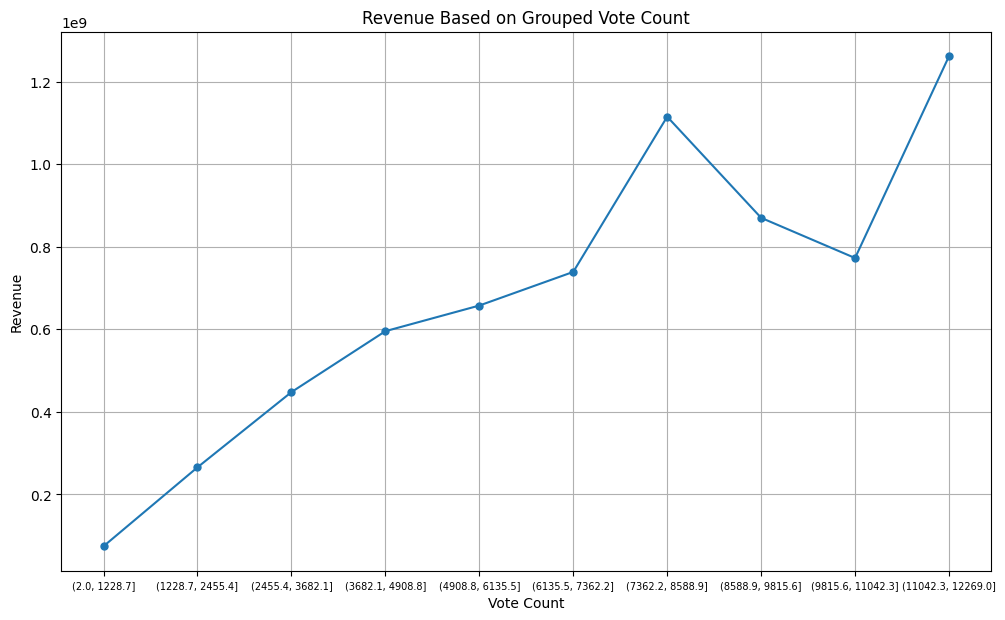

In [8]:
# GPT한테 `vote_count`의 적절한 구간을 나눠달라하고, 구간별 평균 `revenue`를 구해달라함
vote_grouped_revenue = pd.read_csv('/content/drive/MyDrive/EPOCH/data/Adjusted_Grouped_Vote_Count_and_Revenue_Data.csv')
vote_grouped_revenue = pd.DataFrame(vote_grouped_revenue)

# 그래프 그리기
plt.figure(figsize=(12, 7))
plt.plot(vote_grouped_revenue['vote_count_bins'], vote_grouped_revenue['mean_revenue'], 'o-', markersize=5)
plt.xticks(label=vote_grouped_revenue['vote_count_bins'], size = 7)
plt.grid()
plt.ylabel('Revenue')
plt.xlabel('Vote Count')
plt.title('Revenue Based on Grouped Vote Count')
plt.show

3-2. `director_score`, `actor_score`

In [9]:
# 구간 나누기
maindata_director_sort = maindata.sort_values(by='director_score', ascending=True)
maindata_actor_sort = maindata.sort_values(by='actor_score', ascending=True)

director_score_bin = pd.qcut(maindata_director_sort['director_score'], 10, labels=False, duplicates='drop')
actor_score_bin = pd.qcut(maindata_actor_sort['actor_score'], 10, labels=False, duplicates='drop')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x700 with 0 Axes>

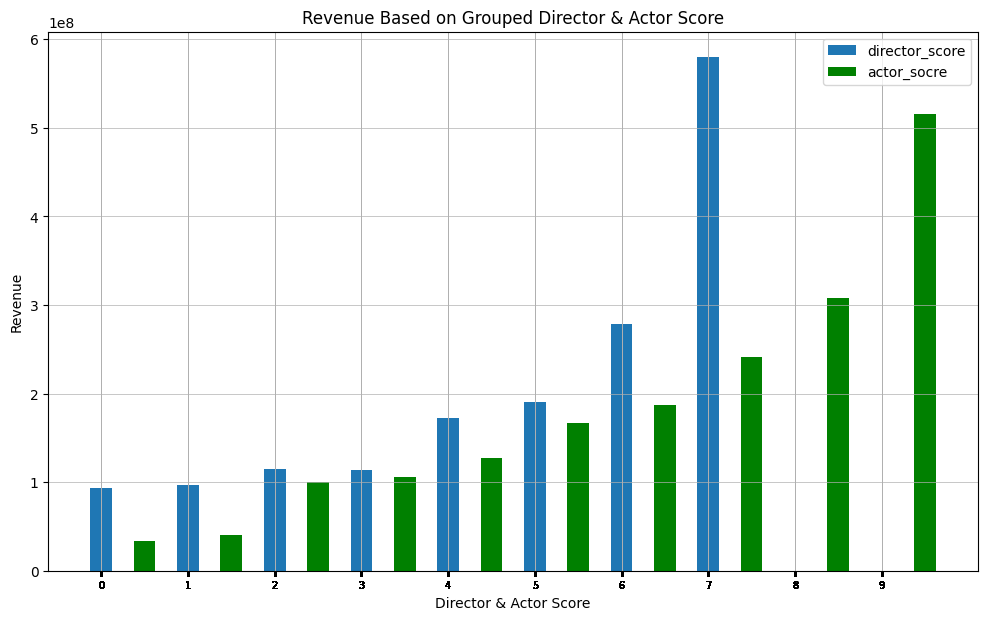

In [10]:
# 지피티한테 구간별 revenue 평균값 구해달라한 파일 불러오기
score_revenue_bin = pd.read_csv('/content/drive/MyDrive/EPOCH/data/merged_mean_revenue_with_bins.csv')
score_revenue_bin = pd.DataFrame(score_revenue_bin)

# 그래프 그리기
plt.figure(figsize=(12, 7))
bar_width = 0.25

plt.figure(figsize=(12, 7))
plt.bar(score_revenue_bin['director_score_bin'], score_revenue_bin['director_mean_revenue'], bar_width)
plt.bar(score_revenue_bin['actor_score_bin'] + 2*bar_width, score_revenue_bin['actor_mean_revenue'], bar_width, color='green')
plt.xticks(score_revenue_bin['actor_score_bin'], size=7)
plt.grid(linewidth=0.5)
plt.ylabel('Revenue')
plt.xlabel('Director & Actor Score')
plt.title('Revenue Based on Grouped Director & Actor Score')
plt.legend(['director_score', 'actor_socre'])
plt.show

3-3. `budget`

<function matplotlib.pyplot.show(close=None, block=None)>

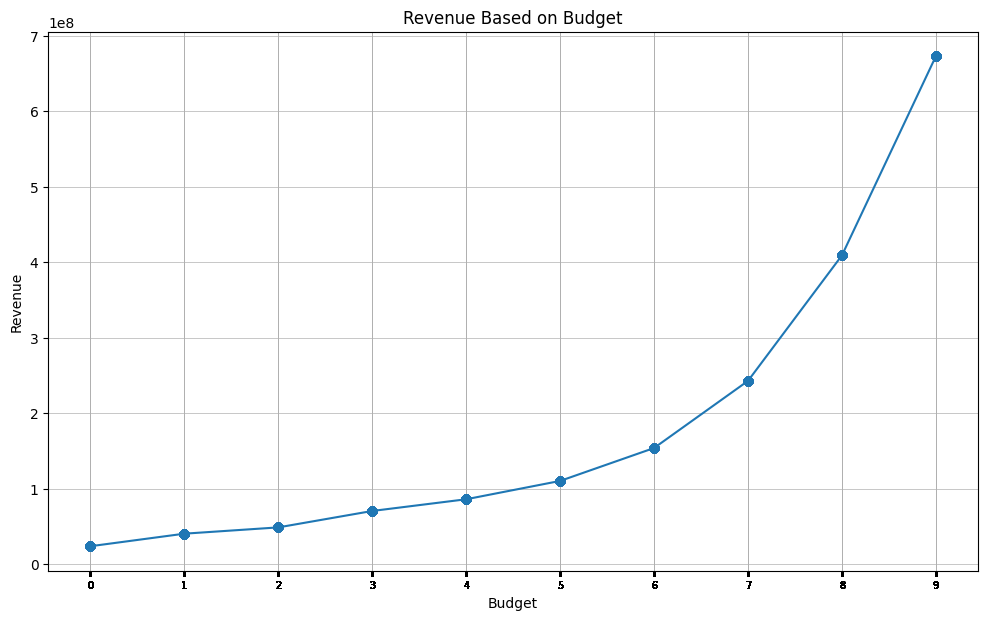

In [11]:
# `budget` 오름차순 정렬
maindata_budget_sort = maindata.sort_values(by='budget', ascending=True)

# 구간 나누기
budget_bin = pd.qcut(maindata_budget_sort['budget'], 10, labels=False, duplicates='drop')

# 지피티한테 구간별 revenue 평균값 구해달라한 파일 불러오기
budget_revenue_bin = pd.read_csv('/content/drive/MyDrive/EPOCH/data/maindata_with_mean_revenue_budget.csv')
budget_revenue_bin = pd.DataFrame(budget_revenue_bin)

# 그래프 그리기
plt.figure(figsize=(12, 7))
plt.plot(budget_revenue_bin['budget_bin'], budget_revenue_bin['mean_revenue_by_bin'], 'o-')
plt.xticks(budget_revenue_bin['budget_bin'], size=7)
plt.grid(linewidth=0.5)
plt.ylabel('Revenue')
plt.xlabel('Budget')
plt.title('Revenue Based on Budget')
plt.show

### production_score와 revenue 간의 상관관계

In [16]:
maindata2 = pd.read_csv('/content/drive/MyDrive/EPOCH/data/maindata_ver2.0.csv')
maindata2 = pd.DataFrame(maindata2)

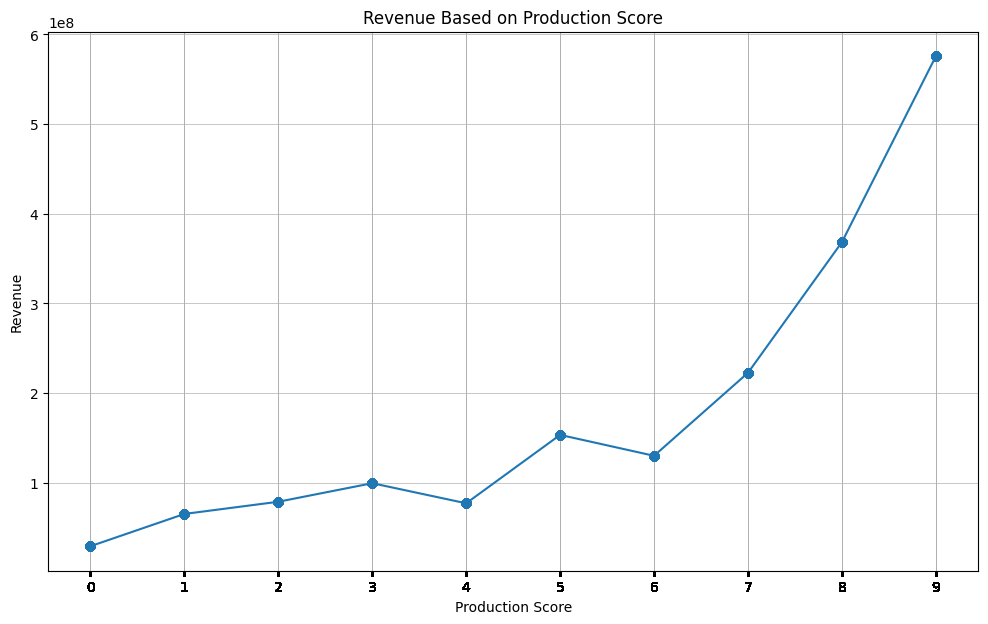

In [28]:
maindata_production_sort = maindata2.sort_values(by='production_score', ascending=True)
production_score_bin = pd.qcut(maindata_production_sort['production_score'], 10, labels=False, duplicates='drop')

# 지피티한테 구간별 revenue 평균값 구해달라한 파일 불러오기
production_revenue_bin = pd.read_csv('/content/drive/MyDrive/EPOCH/data/maindata_with_revenue_bin_mean.csv')
production_revenue_bin = pd.DataFrame(production_revenue_bin)

# 시각화
plt.figure(figsize=(12, 7))
plt.plot(production_revenue_bin['production_score_bin'], production_revenue_bin['revenue_bin_mean'], 'o-')
plt.grid(linewidth=0.5)
plt.xticks(production_revenue_bin['production_score_bin'])
plt.ylabel('Revenue')
plt.xlabel('Production Score')
plt.title('Revenue Based on Production Score')
plt.show()